## Quesiton 14. Implement a classification/ logistic regression problem. For example based on different features of students data, classify, whether a student is suitable for a particular activity. Based on the available dataset, a student can also implement another classification problem like checkingwhether an email is spam or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("student_data.csv")
df.head()

,age,gender,academic_performance,extracurricular_activities,time_management,social_skills,motivation,attendance,communication,teamwork,suitable,sender,subject,body_length,has_attachment,is_reply,is_forward,is_spam
0,24,M,64,8,2,Excellent,Low,48,Good,Good,1,colleague,discount,5356,0,1,0,0
1,21,F,52,3,0,Poor,High,51,Very Good,Excellent,1,friend,discount,4077,0,1,1,0
2,22,M,78,3,2,Poor,Low,28,Fair,Excellent,0,friend,offer,4898,0,0,0,1
3,24,M,72,1,2,Good,Medium,20,Good,Fair,0,colleague,meeting,1417,0,0,1,1
4,20,M,14,5,0,Very Good,Medium,89,Poor,Fair,0,colleague,prize,8846,0,0,0,1


In [3]:
# Load the dataset from CSV file
data = pd.read_csv('student_data.csv')

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the features 
data['gender'] = encoder.fit_transform(data['gender'])
data['social_skills'] = encoder.fit_transform(data['social_skills'])
data['motivation'] = encoder.fit_transform(data['motivation'])
data['communication'] = encoder.fit_transform(data['communication'])
data['teamwork'] = encoder.fit_transform(data['teamwork'])
data['sender'] = encoder.fit_transform(data['sender'])
data['subject'] = encoder.fit_transform(data['subject'])

data

,age,gender,academic_performance,extracurricular_activities,time_management,social_skills,motivation,attendance,communication,teamwork,suitable,sender,subject,body_length,has_attachment,is_reply,is_forward,is_spam
0,24,1,64,8,2,0,1,48,2,2,1,0,0,5356,0,1,0,0
1,21,0,52,3,0,3,0,51,4,0,1,1,0,4077,0,1,1,0
2,22,1,78,3,2,3,1,28,1,0,0,1,2,4898,0,0,0,1
3,24,1,72,1,2,2,2,20,2,1,0,0,1,1417,0,0,1,1
4,20,1,14,5,0,4,2,89,3,1,0,0,3,8846,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23,0,97,5,3,1,2,95,4,3,0,0,2,9395,1,1,0,1
996,18,0,7,6,0,0,2,61,4,0,1,0,1,2823,1,1,0,1
997,24,1,20,9,3,4,2,85,3,4,0,1,1,5287,1,1,0,1
998,21,1,97,3,0,0,1,17,3,1,0,0,2,3285,1,1,1,1


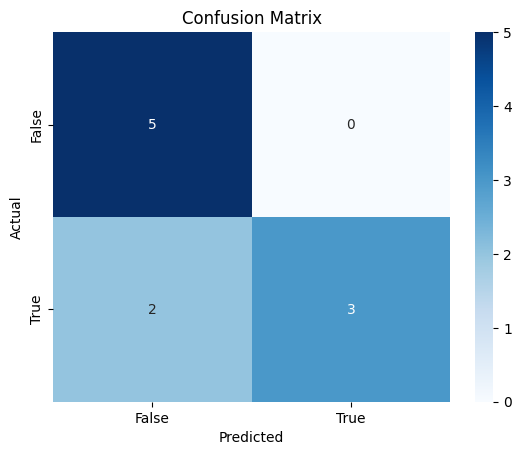

Accuracy: 80.0 %


In [4]:

# Split the dataset into training and test sets
X = data.iloc[0:,:10]
y = data['suitable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Fit a logistic regression model to the training data
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
labels = ['False', 'True']
sns.heatmap(confusion, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy*100,"%")

## `FOR EMAIL SPAM DETECTOR`

In [5]:
data.iloc[0:,11:-1].head()

,sender,subject,body_length,has_attachment,is_reply,is_forward
0,0,0,5356,0,1,0
1,1,0,4077,0,1,1
2,1,2,4898,0,0,0
3,0,1,1417,0,0,1
4,0,3,8846,0,0,0


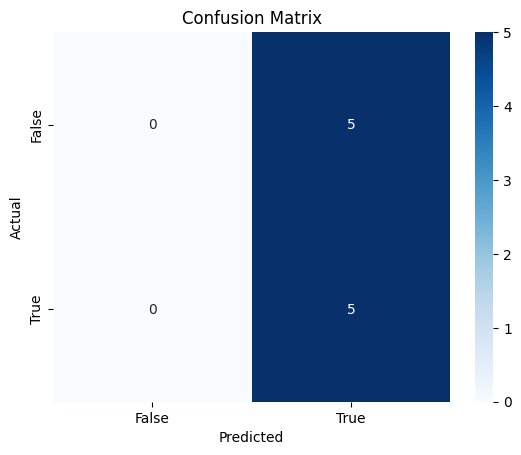

Accuracy: 50.0 %


In [6]:
X = data.iloc[0:,11:-1]
y = data['is_spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Fit a logistic regression model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
labels = ['False', 'True']
sns.heatmap(confusion, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the accuracy and confusion matrix
print("Accuracy:", accuracy*100,"%")